<a href="https://colab.research.google.com/github/rajan-dhinoja/machine_learning_projects/blob/main/Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Step-A: Data Preprocessing:-***

## Step-1: Import Required Dependencies:-
Import essential libraries and modules for data manipulation, visualization, and preprocessing...

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy.sparse
import re
import nltk
import warnings
warnings.filterwarnings('ignore')

# Set the option to prevent silent downcasting
np.set_printoptions(formatter={'float': '{:,.2f}'.format}, suppress=True, precision=2)
pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('future.no_silent_downcasting', True)

## Step-2: Load the Dataset and Display Different overviews of Datasets:-

In [2]:
from google.colab import drive
drive.mount('/content/drive')

dataset = pd.DataFrame(pd.read_csv('/content/drive/MyDrive/Datasets/Big_mart_sales/train_data.csv'))
dataset.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,ProductID,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType,OutletSales
0,FDA15,9.30,Low Fat,0.02,Dairy,249.81,OUT049,1999,Medium,Tier 1,Supermarket Type1,"3,735.14"
1,DRC01,5.92,Regular,0.02,Soft Drinks,48.27,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.42
2,FDN15,17.50,Low Fat,0.02,Meat,141.62,OUT049,1999,Medium,Tier 1,Supermarket Type1,"2,097.27"
3,FDX07,19.20,Regular,0.00,Fruits and Vegetables,182.09,OUT010,1998,NaN,Tier 3,Grocery Store,732.38
4,NCD19,8.93,Low Fat,0.00,Household,53.86,OUT013,1987,High,Tier 3,Supermarket Type1,994.71


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# Seperate the whole datset into categorical and numerical columns...

categorical_cols = dataset.select_dtypes(include=['object']).columns
numerical_cols = dataset.select_dtypes(exclude=['object']).columns

if categorical_cols.empty:
  print("No Categorical Columns Found...")
else:
  print("Categorical Columns: \n", categorical_cols, "\n")

if numerical_cols.empty:
  print("No Numerical Columns Found...")
else:
  print("Numerical Columns: \n", numerical_cols)

Categorical Columns: 
 Index(['ProductID', 'FatContent', 'ProductType', 'OutletID', 'OutletSize',
       'LocationType', 'OutletType'],
      dtype='object') 

Numerical Columns: 
 Index(['Weight', 'ProductVisibility', 'MRP', 'EstablishmentYear',
       'OutletSales'],
      dtype='object')


In [5]:
print("> Shape of the Dataset: \n", dataset.shape, "\n")
print("> Information about Dataset:")
print(dataset.info(), "\n")
print("> Statistical summary of the Dataset:")
print(dataset.describe().map(lambda x: round(x, 4)))

> Shape of the Dataset: 
 (8523, 12) 

> Information about Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ProductID          8523 non-null   object 
 1   Weight             7060 non-null   float64
 2   FatContent         8523 non-null   object 
 3   ProductVisibility  8523 non-null   float64
 4   ProductType        8523 non-null   object 
 5   MRP                8523 non-null   float64
 6   OutletID           8523 non-null   object 
 7   EstablishmentYear  8523 non-null   int64  
 8   OutletSize         6113 non-null   object 
 9   LocationType       8523 non-null   object 
 10  OutletType         8523 non-null   object 
 11  OutletSales        8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB
None 

> Statistical summary of the Dataset:
        Weight  ProductVisibility      MRP  

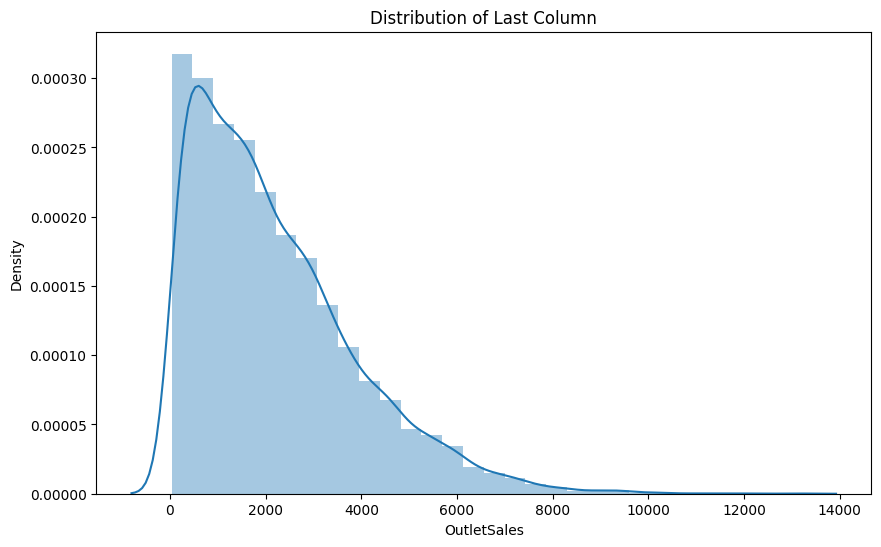

In [6]:
plt.figure(figsize=(10, 6))
sns.distplot(dataset.iloc[:, -1], bins=30, kde=True)
plt.title('Distribution of Last Column')
plt.show()

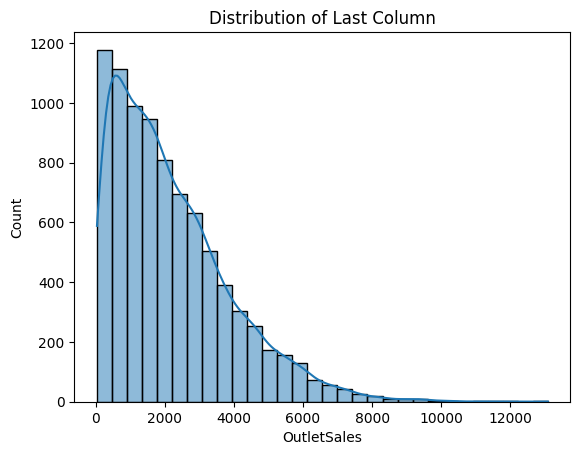

In [7]:
# Plot target distribution
sns.histplot(dataset.iloc[:, -1], bins=30, kde=True)
plt.title('Distribution of Last Column')
plt.show()

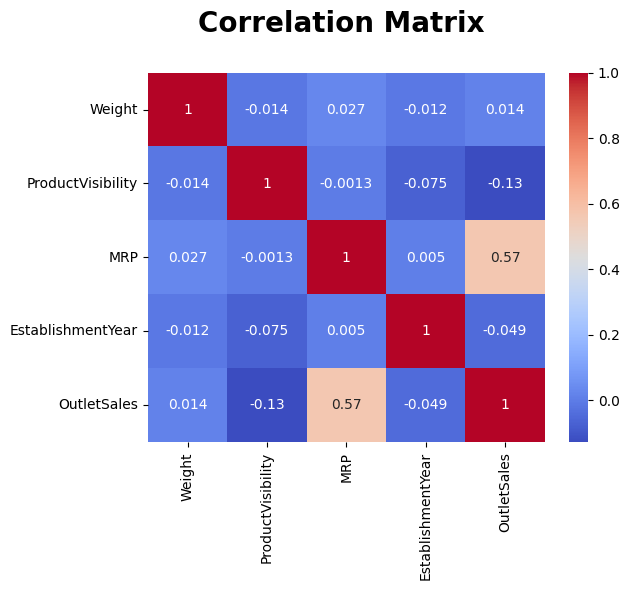

In [8]:
# Correlation Matrix Heatmap
sns.heatmap(dataset[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix \n',fontsize=20,  fontweight=800)
plt.show()

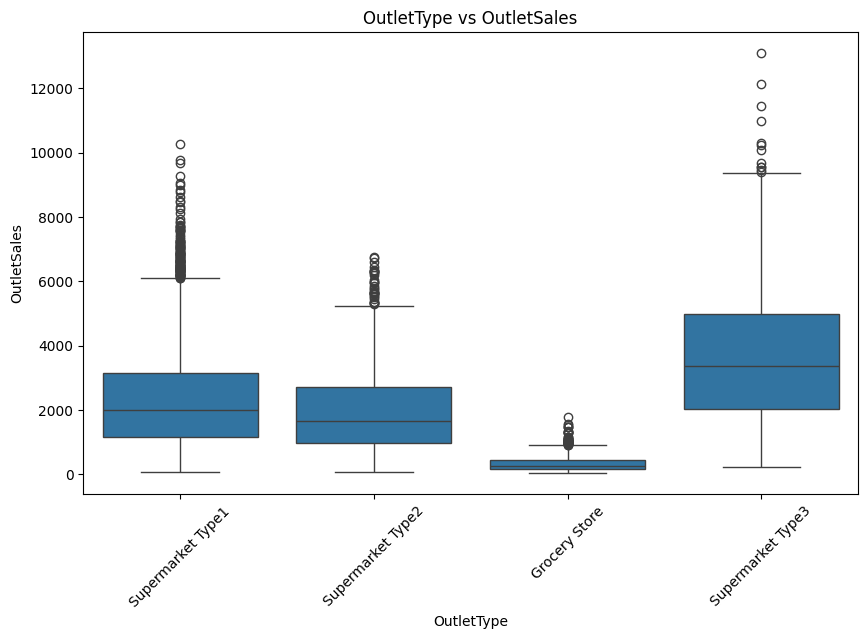

In [9]:
# Boxplot for OutletType vs OutletSales
plt.figure(figsize=(10, 6))
sns.boxplot(x='OutletType', y='OutletSales', data=dataset)
plt.xticks(rotation=45)
plt.title('OutletType vs OutletSales')
plt.show()

## Step-3:- Checking the Dataset:-

### Step-3.1: Checking any Duplicate Data and Handling them:-

In [10]:
if dataset.duplicated().any():
  dataset.drop_duplicates(inplace=True)
  print("Duplicate Data(or Identical Rows) found and Removed...")
else:
    print("No Duplicate Data(or Identical Rows) found...")

No Duplicate Data(or Identical Rows) found...


### Step-3.2: Cheking any Missing Data and Handling them:-

In [11]:
# Here from the module named impute of the library scikit-learn, we are using the SimpleImputer Class to Handle the Missing Values.
from sklearn.impute import SimpleImputer

missing_data_counts = dataset.isnull().sum() + dataset.isin(['', 'N/A', 'Unknown', 'NaN']).sum()

# if dataset.isnull().values.any() or dataset.isin(['', 'NaN', 'N/A', 'Unknown']).any().any():
if missing_data_counts.any():

  categorical_missing_counts = dataset[categorical_cols].isnull().sum() + dataset[categorical_cols].isin(['', 'N/A', 'Unknown', 'NaN']).sum()
  numerical_missing_counts = dataset[numerical_cols].isnull().sum()

  # Replace "Unknown" with NaN in categorical columns
  for col in categorical_cols:
    dataset[col] = dataset[col].replace('Unknown', np.nan)


  # Check if there are any missing values (categorical or numerical)
  if categorical_missing_counts.any() or numerical_missing_counts.any():
      # Print missing counts for categorical columns in the desired format
      print("Missing Data Counts in Categorical Columns: \n", categorical_missing_counts)
      print("\n")
      print("Missing Data Counts in Numerical Columns: \n", numerical_missing_counts)

      # Create imputers for categorical and numerical features
      categorical_imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
      numerical_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

      # Apply imputers to the selected columns in X
      if len(categorical_cols) > 0:
        categorical_cols_for_impution = [col for col in categorical_cols if col != dataset.columns[-1]]
        dataset[categorical_cols_for_impution] = categorical_imputer.fit_transform(dataset[categorical_cols_for_impution])

      # Exclude the dependent variable column (last column) if it's numerical
      numerical_cols_for_impution = [col for col in numerical_cols if col != dataset.columns[-1]]
      if len(numerical_cols_for_impution) > 0:
          dataset[numerical_cols_for_impution] = numerical_imputer.fit_transform(dataset[numerical_cols_for_impution])
      # if len(numerical_cols) > 0:
          # dataset[numerical_cols] = numerical_imputer.fit_transform(dataset[numerical_cols])

      print("\n")
      print("New Data with replaced missing values: \n", dataset.head(10).to_string(header=True))
else:
    print("No missing data found.")



Missing Data Counts in Categorical Columns: 
 ProductID          0
FatContent         0
ProductType        0
OutletID           0
OutletSize      2410
LocationType       0
OutletType         0
dtype: int64


Missing Data Counts in Numerical Columns: 
 Weight               1463
ProductVisibility       0
MRP                     0
EstablishmentYear       0
OutletSales             0
dtype: int64


New Data with replaced missing values: 
   ProductID  Weight FatContent  ProductVisibility            ProductType    MRP OutletID  EstablishmentYear OutletSize LocationType         OutletType  OutletSales
0     FDA15    9.30    Low Fat               0.02                  Dairy 249.81   OUT049           1,999.00     Medium       Tier 1  Supermarket Type1     3,735.14
1     DRC01    5.92    Regular               0.02            Soft Drinks  48.27   OUT018           2,009.00     Medium       Tier 3  Supermarket Type2       443.42
2     FDN15   17.50    Low Fat               0.02                   Me

### Step-3.3: Checking any Synonyms or Aliases and Handling them:-

In [12]:
# for col in dataset.columns:
#   # Get value counts and convert to DataFrame with column name
#   # .reset_index(name='Counts: '): This converts the Series into a DataFrame and names the count column as 'Counts: '.
#   value_counts_dataset = dataset[col].value_counts().rename_axis('Unique Values: ').reset_index(name='Counts: ')

#   # Transpose and print with formatting
#   print(f"Column: \t'{col}'")
#   # .to_string(header=False): This converts the transposed DataFrame to a string for printing and removes the header row.
#   print(value_counts_dataset.T.to_string(header=False), "\n")


In [13]:
# from IPython.display import HTML

# for col in dataset.columns:
#     value_counts_dataset = dataset[col].value_counts().rename_axis('Unique Values: ').reset_index(name='Counts: ')

#     # Display first 5 counts
#     html_table = value_counts_dataset.head(5).to_html()

#     # Create HTML with button and hidden content
#     html_str = f"""
#     <div>
#         Column: '{col}'<br>
#         {html_table}
#         <button onclick="toggleContent('{col}')">Show More</button>
#         <div id="content-{col}" style="display: none;">
#             {value_counts_dataset.iloc[5:].to_html()}
#         </div>
#     </div>
#     <br/>
#     """

#     # Display the HTML
#     display(HTML(html_str))


# # JavaScript function to toggle content visibility
# display(HTML("""
# <script>
# function toggleContent(col) {
#     var content = document.getElementById('content-' + col);
#     if (content.style.display === 'none') {
#         content.style.display = 'block';
#     } else {
#         content.style.display = 'none';
#     }
# }
# </script>
# """))

In [14]:
from IPython.display import HTML

for col in dataset.columns:
    value_counts_dataset = dataset[col].value_counts().rename_axis('Unique Values: ').reset_index(name='Counts: ')

    # Transpose the DataFrame for horizontal display
    value_counts_dataset = value_counts_dataset.T  # Transpose

    # Rename columns for better display
    value_counts_dataset.columns = value_counts_dataset.iloc[0]
    value_counts_dataset = value_counts_dataset[1:]

    # Display first 5 counts horizontally
    html_table = value_counts_dataset.iloc[:, :5].to_html()  # Select first 5 columns

    # Create HTML with button and hidden content (for remaining columns)
    html_str = f"""
    <div>
        Column: '{col}'<br>
        {html_table}
        <button onclick="toggleContent('{col}')">Show More</button>
        <div id="content-{col}" style="display: none;">
            {value_counts_dataset.iloc[:, 5:].to_html()}
        </div>
    </div>
    <br/>
    """

    # Display the HTML
    display(HTML(html_str))


# JavaScript function to toggle content visibility (remains the same)
display(HTML("""
<script>
function toggleContent(col) {
    var content = document.getElementById('content-' + col);
    if (content.style.display === 'none') {
        content.style.display = 'block';
    } else {
        content.style.display = 'none';
    }
}
</script>
"""))

Unique Values:,OUT027,OUT013,OUT049,OUT046,OUT035
Counts:,935,932,930,930,930
Unique Values:,OUT045,OUT018,OUT017,OUT010,OUT019
Counts:,929,928,926,555,528


In [15]:
# # Handling ProductID Column
dataset['ProductID'] = dataset['ProductID'].apply(lambda x: x[:2])
# dataset['ProductID'] = dataset['ProductID'].map({'FD': 'Food', 'NC': 'Non-Consumable', 'DR': 'Drinks'})
print("> After Handling the Prefixes of 'ProductID' Column and changed to new Name:")
print(dataset['ProductID'].value_counts())

# print("\n")

# Handling FatContent Column
dataset['FatContent'] = dataset['FatContent'].replace({ 'LF': 'Low Fat', 'low fat': 'Low Fat', 'Low fat': 'Low Fat', 'reg': 'Regular'})
dataset.loc[dataset['ProductID'] == 'NC', 'FatContent'] = 'Non-Edible'
print("> After Handling the Aliases of 'FatContent' Column:")
print(dataset['FatContent'].value_counts())

print("\n")

# Handling EstablishmentYear Column
import datetime as dt
current_year = dt.datetime.today().year
dataset['OutletAge'] = current_year - dataset['EstablishmentYear']
dataset = dataset.drop('EstablishmentYear', axis=1)
print("> 'EstablishmentYear' column is Deleted, Instead 'OutletAge' column is created...")
print(dataset['OutletAge'].value_counts())

> After Handling the Prefixes of 'ProductID' Column and changed to new Name:
ProductID
FD    6125
NC    1599
DR     799
Name: count, dtype: int64
> After Handling the Aliases of 'FatContent' Column:
FatContent
Low Fat       3918
Regular       3006
Non-Edible    1599
Name: count, dtype: int64


> 'EstablishmentYear' column is Deleted, Instead 'OutletAge' column is created...
OutletAge
40.00    1463
38.00     932
26.00     930
28.00     930
21.00     930
23.00     929
16.00     928
18.00     926
27.00     555
Name: count, dtype: int64


### Step-3.4: Checking for Stopwords and Stemming them:-

In [16]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

if categorical_cols.any():

  nltk.download('stopwords')

  stop_words = set(stopwords.words('english'))
  stop_wprds = stop_words.remove('not')

  def stemming(text):
      words = text.lower().split()

      stemmer = PorterStemmer()
      stemmed_words = [stemmer.stem(word) for word in words if word not in stop_words]
      return ' '.join(stemmed_words)  # Join stemmed words back into a string

  # Apply the stemming function to the specified columns
  for column in categorical_cols:
      dataset[column] = dataset[column].astype(str).apply(stemming)

  print("\n > Stemming Completed... \n")
  print(dataset.head().to_string(header=True))
else:
  print("No Stemming Needed...")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!



 > Stemming Completed... 

  ProductID  Weight FatContent  ProductVisibility  ProductType    MRP OutletID OutletSize LocationType         OutletType  OutletSales  OutletAge
0        fd    9.30    low fat               0.02        dairi 249.81   out049     medium       tier 1  supermarket type1     3,735.14      26.00
1        dr    5.92    regular               0.02   soft drink  48.27   out018     medium       tier 3  supermarket type2       443.42      16.00
2        fd   17.50    low fat               0.02         meat 141.62   out049     medium       tier 1  supermarket type1     2,097.27      26.00
3        fd   19.20    regular               0.00  fruit veget 182.09   out010     medium       tier 3      groceri store       732.38      27.00
4        nc    8.93     non-ed               0.00    household  53.86   out013       high       tier 3  supermarket type1       994.71      38.00


### Step-3.5: Checking any Categorical Data and Encoding them:-

In [17]:
# `sklearn.compose` is a module in scikit-learn (a popular Python machine learning library) used for combining different data transformations.
# sklearn.preprocessing is a module within scikit-learn that provides tools for preparing your data for machine learning algorithms.
# LabelEncoder is a specific class designed to convert categorical labels (like 'France', 'Spain', 'Germany') into numerical labels (like 0, 1, 2).
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1].values

repeating_cols = []
for col in categorical_cols:
    # Matrix of Feature
    if col != dataset.columns[-1]:
      print(f"> String Values present in Column '{col}'.")
      # Check for repeating values within the categorical column
      value_counts = dataset[col].value_counts()
      repeating_values = value_counts[value_counts > 1].index.tolist()
      if repeating_values:
        repeating_cols.append(col)
        print(f"\t- Also, Categorical values found in column '{col}': {repeating_values}.")
        print(f"\t-'{col}' is Encoded Successfully...\n")

      else:
        print(f"\t- But No Categorical values found in column '{col}'.\n")

    # Dependent Variable/Output
    if col == dataset.columns[-1]:
      print(f"> String Values present in Column '{col}'(Output Column).")
      # Check for repeating values within the categorical column
      value_counts = dataset[col].value_counts()
      repeating_values = value_counts[value_counts > 1].index.tolist()
      if repeating_values:
        print(f"\t- Also, Categorical values found in column '{col}': {repeating_values}")
        le = LabelEncoder()
        y = le.fit_transform(dataset[col])
        print(f"\t-'{col}' is Encoded Successfully...\n")
      else:
        print(f"\t- But No Categorical values found in column '{col}'.\n")

print("=> Repeating Columns in Matrix of Features(X): ", repeating_cols, "\n")
if repeating_cols:
  encoder = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), repeating_cols)], remainder='passthrough')
  encoder_transform = encoder.fit_transform(X)

  # Conditional conversion to dense array
  if scipy.sparse.issparse(encoder_transform):  # Check if sparse
    X = encoder_transform.toarray()
  else:
    X = encoder_transform

else:
  print("No Repeating Columns found in Matrix of Features(X). \n")

print("Matrix of Features(X): \n", pd.DataFrame(X).head().to_string(header=True))
print("\n")
print("Dependent Variable(y): \n", pd.DataFrame(y).head().to_string(header=False, index=False))


> String Values present in Column 'ProductID'.
	- Also, Categorical values found in column 'ProductID': ['fd', 'nc', 'dr'].
	-'ProductID' is Encoded Successfully...

> String Values present in Column 'FatContent'.
	- Also, Categorical values found in column 'FatContent': ['low fat', 'regular', 'non-ed'].
	-'FatContent' is Encoded Successfully...

> String Values present in Column 'ProductType'.
	- Also, Categorical values found in column 'ProductType': ['fruit veget', 'snack food', 'household', 'frozen food', 'dairi', 'can', 'bake good', 'health hygien', 'soft drink', 'meat', 'bread', 'hard drink', 'other', 'starchi food', 'breakfast', 'seafood'].
	-'ProductType' is Encoded Successfully...

> String Values present in Column 'OutletID'.
	- Also, Categorical values found in column 'OutletID': ['out027', 'out013', 'out049', 'out046', 'out035', 'out045', 'out018', 'out017', 'out010', 'out019'].
	-'OutletID' is Encoded Successfully...

> String Values present in Column 'OutletSize'.
	- Also

## Step-4: Split the Dataset into the Training set and Test set:-

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Printing Training Sets: ")
print("> X_train: \n", X_train)
print("> X_test: \n", X_test, "\n")

print("\n")

print("Printing Test Sets: ")
print("> y_train: \n", y_train)
print("> y_test: \n", y_test)

Printing Training Sets: 
> X_train: 
 [[0.00 1.00 0.00 ... 0.04 171.34 2,386.23]
 [0.00 0.00 1.00 ... 0.05 170.54 3,103.96]
 [0.00 1.00 0.00 ... 0.08 111.72 1,125.20]
 ...
 [0.00 0.00 1.00 ... 0.02 237.36 6,145.33]
 [0.00 1.00 0.00 ... 0.05 117.95 1,649.85]
 [0.00 0.00 1.00 ... 0.02 95.74 965.41]]
> X_test: 
 [[0.00 1.00 0.00 ... 0.03 79.43 1,743.06]
 [0.00 0.00 1.00 ... 0.07 42.71 356.87]
 [0.00 1.00 0.00 ... 0.04 42.05 377.51]
 ...
 [0.00 1.00 0.00 ... 0.04 42.05 629.18]
 [0.00 1.00 0.00 ... 0.14 50.50 253.00]
 [0.00 1.00 0.00 ... 0.06 109.23 976.73]] 



Printing Test Sets: 
> y_train: 
 [26.00 23.00 28.00 ... 23.00 18.00 28.00]
> y_test: 
 [38.00 28.00 26.00 ... 38.00 16.00 23.00]


## Step-5: Feature Scaling:-

In [19]:
""" Here we are not applying Feature Scaling in Dependent Variable (y), because there are only 0 and 1 values in y """
# StandardScaler class from scikit-learn, which is a tool for standardization and Normalization.
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Convert X_train and X_test to NumPy arrays if they are DataFrames
X_train = X_train.to_numpy() if isinstance(X_train, pd.DataFrame) else X_train
X_test = X_test.to_numpy() if isinstance(X_test, pd.DataFrame) else X_test

# Iterate through columns of X_train and X_test
for col in range(X_train.shape[1]):  # Use range to get column indices
    # Check if all values in the column are 0 or 1
    if np.all(np.isin(X_train[:, col], [0, 1])):
        continue  # Skip scaling for this column
    else:
        # Reshape the column before scaling
        X_train[:, col] = scaler.fit_transform(X_train[:, col].reshape(-1, 1)).flatten()
        X_test[:, col] = scaler.transform(X_test[:, col].reshape(-1, 1)).flatten()

print("Printing Training Sets after Feature Scaling:")
print("> X_train: \n", X_train)
print("\n")
print("Printing Test Sets after Feature Scaling:")
print("> X_test: \n", X_test)

Printing Training Sets after Feature Scaling:
> X_train: 
 [[0.00 1.00 0.00 ... -0.60 0.47 0.11]
 [0.00 0.00 1.00 ... -0.36 0.46 0.52]
 [0.00 1.00 0.00 ... 0.19 -0.48 -0.63]
 ...
 [0.00 0.00 1.00 ... -0.92 1.53 2.29]
 [0.00 1.00 0.00 ... -0.23 -0.38 -0.32]
 [0.00 0.00 1.00 ... -0.95 -0.74 -0.72]]


Printing Test Sets after Feature Scaling:
> X_test: 
 [[0.00 1.00 0.00 ... -0.77 -1.00 -0.27]
 [0.00 0.00 1.00 ... 0.10 -1.59 -1.07]
 [0.00 1.00 0.00 ... -0.48 -1.60 -1.06]
 ...
 [0.00 1.00 0.00 ... -0.48 -1.60 -0.91]
 [0.00 1.00 0.00 ... 1.46 -1.46 -1.13]
 [0.00 1.00 0.00 ... -0.21 -0.52 -0.71]]


# ***Step-B: Model Builing & Evaluation :-***

In [20]:
 # from sklearn.linear_model import LinearRegression
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.svm import SVR
# from sklearn.neighbors import KNeighborsRegressor
# from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
# from sklearn.model_selection import cross_val_score

# models = [LinearRegression(), DecisionTreeRegressor(),  RandomForestRegressor(), KNeighborsRegressor(), SVR()]

# for model in models:
#   model.fit(X_train, y_train)
#   y_pred = model.predict(X_test)

#   cv_score = cross_val_score(model, X, y, cv=5)
#   print(f"-> {model.__class__.__name__}:-")
#   print(f"\t R2 Score: \t{r2_score(y_test, y_pred):.2f}")
#   print(f"\t CV Score : \t{cv_score.mean()*100:.2f}%")
#   print(f"\t MSE: \t\t{mean_squared_error(y_test, y_pred):.2f}")
#   print(f"\t RMSE : \t{np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")
#   print(f"\t MAE : \t\t{mean_absolute_error(y_test, y_pred):.2f}")
#   print("\n")


In [21]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

cv_score = cross_val_score(model, X, y, cv=5)
print(f"-> {model.__class__.__name__}:-")
print(f"\t R2 Score: \t{r2_score(y_test, y_pred):.2f}")
print(f"\t CV Score : \t{cv_score.mean()*100:.2f}%")
print(f"\t MSE: \t\t{mean_squared_error(y_test, y_pred):.2f}")
print(f"\t RMSE : \t{np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")
print(f"\t MAE : \t\t{mean_absolute_error(y_test, y_pred):.2f}")
print("\n")


-> RandomForestRegressor:-
	 R2 Score: 	1.00
	 CV Score : 	100.00%
	 MSE: 		0.00
	 RMSE : 	0.00
	 MAE : 		0.00




# Saving the Model

In [22]:
# import pickle

# filename = 'sales_prediction.sav'
# pickle.dump(model, open(filename, 'wb'))

In [23]:
# #loading the saved model...
# loaded_model = pickle.load(open('sales_prediction.sav', 'rb'))